In [1]:
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timezone

# Import data

In [2]:
# Define filename
camera_data_filename = "camera_00001.03652_start_20210201_end_20210203_raw"
#"camera_00001.03652_start_20210201_end_20210201_raw"
#"camera_00001.03652_class_cars_start_20200901_end_20200903"
#"camera_00001.03652_start_20200901_end_20200903"
# Define filepath
camera_data_filepath = f"../data/raw/{camera_data_filename}.csv"
# Read csv
camera_data = pd.read_csv(camera_data_filepath)

# Clean data

In [3]:
# Round up counts
camera_data['counts'] = camera_data.counts.round(0)
camera_data['counts'] = pd.to_numeric(camera_data.counts, downcast='integer')
# Convert string to datetime
camera_data['measurement_start_utc'] = pd.to_datetime(camera_data.measurement_start_utc)
# Extrapolate vehicle flows from 10sec to minute
camera_data['flow_veh_min'] = camera_data.counts.apply(lambda x: x*6)
# Create a UK time timestamp
camera_data['gmt_timestamp'] = camera_data.measurement_start_utc.apply(lambda x: x.replace(tzinfo=timezone.utc).timestamp())#format(x.replace(tzinfo=timezone.utc).timestamp(),'.1f'))
# Remove unnessary columns
camera_data = camera_data.drop(columns=['Unnamed: 0'])
# Drop duplicates
camera_data = camera_data.drop_duplicates(subset=['gmt_timestamp','detection_class'])

## Inspect data

<AxesSubplot:title={'center':'Camera 00001.03652'}, xlabel='measurement_start_utc'>

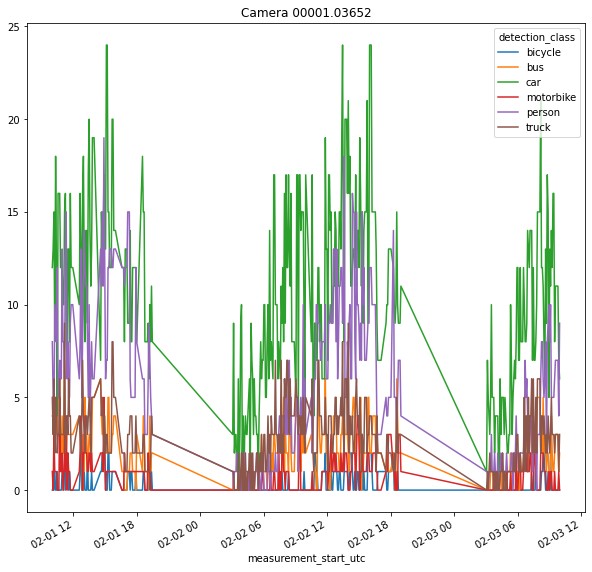

In [4]:
camera_data.pivot(index='measurement_start_utc', columns='detection_class', values='counts').plot(figsize=(10,10),title='Camera 00001.03652')

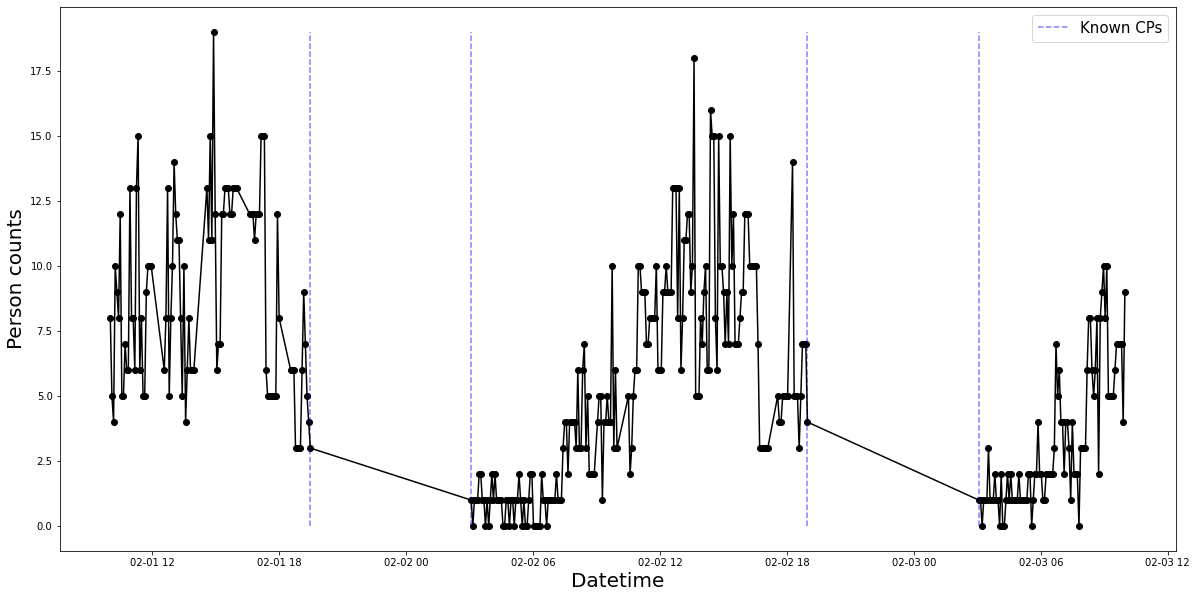

In [6]:
true_cps = [95,96,288,289]
identified_person_cps = [0,44,73,95,152,191,264,288,335,355]


person_counts = camera_data[camera_data.detection_class=='person'].counts.values
dates = camera_data[camera_data.detection_class=='person'].measurement_start_utc.values
identified_cp_dates = camera_data[camera_data.detection_class=='person'].measurement_start_utc.iloc[identified_person_cps].values
true_cp_dates = camera_data[camera_data.detection_class=='person'].measurement_start_utc.iloc[true_cps].values
T = person_counts.shape[0]
plt.figure(figsize=(20,10))
plt.scatter(dates,person_counts,color='black')
plt.plot(dates,person_counts,color='black')
# plt.vlines(cp_dates,np.min(person_counts),np.max(person_counts),color='red',linestyle='dashed',label='MAP CPs')
plt.vlines(true_cp_dates,np.min(person_counts),np.max(person_counts),color='blue',linestyle='dashed',alpha=0.5,label='Known CPs')
plt.xlabel('Datetime',fontsize=20)
plt.ylabel('Person counts',fontsize=20)
plt.legend(prop={'size': 15})

### Plot histograms

In [7]:
# plt.subplots(nrows=2,ncols=3,figsize=(20,10))
# for i,col in enumerate(['bicycle','bus','car','motorbike','person','truck']):
#     plt.subplot(2,3,i+1)
#     plt.title(col)
#     plt.hist(camera_changepoint_data[col])
#     print(col,'mean =',np.mean(camera_changepoint_data[col]),np.std(camera_changepoint_data[col]))

## Export data
All data in one file and all data in multiple files

In [8]:
camera_changepoint_data = pd.DataFrame(camera_data.pivot(index='gmt_timestamp', columns='detection_class', values='counts').to_records())
# Create a discete time column
camera_changepoint_data['Time'] = range(1,camera_changepoint_data.shape[0]+1)
# # Drop timestamp
camera_changepoint_data = camera_changepoint_data.drop(columns='gmt_timestamp')

In [9]:
camera_changepoint_data.to_csv(r'../data/output/vehicle_counts/camera3652_counts.txt', index=None, sep=',', mode='a')

In [11]:
camera_changepoint_data[['Time',col]]

,Time,truck
0,1,5
1,2,3
2,3,6
3,4,2
4,5,5
...,...,...
375,376,3
376,377,3
377,378,3
378,379,1


In [10]:
for col in ['bicycle','bus','car','motorbike','person','truck']:
#     print(camera_changepoint_data[['Time',col]])
#     print('\n')
    camera_changepoint_data[['Time',col]].to_csv(f'../data/output/vehicle_counts/camera3652_{col}_counts.txt', index=None, sep=',', mode='a')